#### 1. Сколько у нас пользователей, которые совершили покупку только один раз? 


#### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?


#### 3. По каждому товару определить, в какой день недели товар чаще всего покупается.


#### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например в Ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.


#### 5. Напиши функцию на python, позволяющую строить когортный анализ. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 


#### 6. Построй RFM-кластеры для пользователей. Выведи для каждого кластера средние значения метрик R, F, M. (подробно опиши, как были построены метрики R, F, M).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from dateutil import parser
from matplotlib import pyplot as plt

In [2]:
users = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')

In [3]:
users.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [4]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [5]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [6]:
items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


###  Задача 1:
Сколько у нас пользователей, которые совершили покупку только один раз?

In [7]:
"""
1. Отфильтровать те заказы, статус которых соответствует покупке (на выбор студента, главное агрументировать)
2. Для каждого пользователя рассчитать количество покупок
3. Отфильтровать пользователей с 1 покупкой
4. Посчитать количество уникальных customer_id

"""

task_1 = (
    orders
    .query('order_status != "created"')
    .merge(users, on='customer_id')
    .groupby('customer_unique_id', as_index=False)
    .order_id
    .nunique()
    .query('order_id == 1')
    .customer_unique_id
    .nunique()
)

In [8]:
task_1

93096

###  Задача 2:
Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [9]:
"""
1. Отфильтровать те заказы, статус которых соответствует негативному событию (на выбор студента, главное агрументировать)
2. Рассчитать месяц на основе дат (самый простой вариант - отрезать год и месяц)
3. Для каждого месяца и каждого негативного статуса рассчитать уникальное количество заказов
4. Для каждого статуса рассчитать среднее количество заказов по месяцам

"""

task_2 = (
    orders[orders.order_status.isin(['unavailable', 'canceled'])]
        .assign(month = lambda row: row.order_purchase_timestamp.str[:7])
        .groupby(['month', 'order_status'], as_index=False)
        .order_id.nunique()
        .groupby('order_status', as_index=False)    
        .order_id.mean()
)

task_2

,order_status,order_id
0,canceled,26.041667
1,unavailable,29.000000



### Задача 3:
По каждому товару определить, в какой день недели товар чаще всего покупается.

In [10]:
"""
1. К таблице items приджойнить поле order_purchase_timestamp из orders
2. Из поля order_purchase_timestamp получить номер дня внутри недели (я сделал с помощью isocalendar)
3. Для каждого товара выделить день, которому соответствует наибольшее количество продаж (я сделал с помощью value_counts)

"""

task_3 = (
    items
        .merge(
            orders[['order_id', 'order_purchase_timestamp']],
            on='order_id',
            how='left'
        )
)

task_3['dayofweek'] = (
    task_3
        .order_purchase_timestamp
        .apply(lambda x: parser.parse(x).isocalendar()[2])
)

task_3 = (
    task_3
        .groupby('product_id', as_index=False)
        .dayofweek.agg(lambda x: x.value_counts().index[0])
)

In [11]:
task_3

,product_id,dayofweek
0,00066f42aeeb9f3007548bb9d3f33c38,7
1,00088930e925c41fd95ebfe695fd2655,2
2,0009406fd7479715e4bef61dd91f2462,4
3,000b8f95fcb9e0096488278317764d19,5
4,000d9be29b5207b54e86aa1b1ac54872,2
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,6
32947,fff81cc3158d2725c0655ab9ba0f712c,1
32948,fff9553ac224cec9d15d49f5a263411f,5
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,2


### Задача 4:
Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
Не стоит забывать, что внутри месяца может быть не целое количество недель. 
Например в Ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [12]:
"""
1. Для каждого месяца в датасете рассчитать количество дней
2. Выделить количество недель внутри месяца, поделив количество дней на 7
3. Отфильтровать заказы в статусах, несоответствующих покупке
4. Приджойнить к orders уникальные идентификаторы пользователей
5. Добавить к orders колонку с месяцем покупки
6. Для каждого пользователя внутри месяца рассчитать общее количество заказов
7. К orders приджойнить количества неделя по месяцам
8. Поделить кол-во заказов по пользователям-месяцам на количество кол-во недель в месяце

"""

calendar = pd.DataFrame(
    pd.date_range(
        orders.order_purchase_timestamp.min()[:10], 
        orders.order_purchase_timestamp.max()[:10]
    ), 
    columns=['dates']
)
calendar['month'] = calendar.dates.apply(lambda x: x.isoformat()[:7])
calendar = (
    calendar
        .groupby('month', as_index=False)
        .dates.nunique()
        .assign(weeks_count = lambda x: x.dates / 7)
        [['month', 'weeks_count']]
)

task_4 = (
    orders[~orders.order_status.isin(['created'])]
        .merge(
            users[['customer_id', 'customer_unique_id']], 
            on='customer_id', 
            how='left'
        )
        .assign(month = lambda row: row.order_purchase_timestamp.str[:7])
        .groupby(['customer_unique_id', 'month'], as_index=False)
        .order_id.nunique()
        .merge(calendar, on='month', how='left')
        .assign(orders_weekly_frequency = lambda x: x.order_id / x.weeks_count)
        [['customer_unique_id', 'month', 'orders_weekly_frequency']]
)

task_4.head(5)

,customer_unique_id,month,orders_weekly_frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,0.233333


### Задача 5:
Напиши функцию на python, позволяющую строить когортный анализ. 
В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц

<img src='https://d35fo82fjcw0y8.cloudfront.net/2016/03/03210554/table1a2.png'>

In [14]:
"""
1. Отфильтровал только те заказы, которые считаем "успешными"
2. Обогатил информацией об уникальном идентификаторе пользователя
3. Добавл для каждого пользователя его когорту, рассчитанную по месяцу первого заказа
4. С помощью cumcount для каждого заказа внутри когорты рассчитал его порядковый номер месяца
6. Построил сводную таблицу с количеством вернувшихся пользователей внутри когорты на N-й месяц жизни когорты
7. С помощью div перевёл количества пользователей в доли

"""

task5 = (
    orders
        [~orders.order_status.isin(['created'])]
        .merge(
            users[['customer_id', 'customer_unique_id']], 
            on='customer_id', 
            how='left'
        )
)

task5['month'] = task5['order_purchase_timestamp'].apply(lambda x: x[:7])

task5 = task5.merge(
    task5
        .groupby('customer_unique_id', as_index=False)
        .month.min()
        .rename({'month': 'cohort'}, axis=1),
    on='customer_unique_id',
    how='left'
)

task5['ret_month'] = (
    task5
        .groupby('customer_unique_id', as_index=False)
        .month
        .cumcount()
)
task5['retention'] = 1

task5 = pd.pivot_table(
    task5, 
    values='retention', 
    index='cohort', 
    columns='ret_month', 
    aggfunc=np.sum
)

task5 = task5.div(task5[0], axis=0).fillna(0).drop(0, axis=1)

In [15]:
task5

ret_month,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
cohort,,,,,,,,,,,,,,,,
2016-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-10,0.037383,0.003115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-12,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01,0.075916,0.013089,0.002618,0.001309,0.001309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-02,0.041667,0.003995,0.000571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-03,0.049317,0.006449,0.001138,0.000379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-04,0.045918,0.004252,0.000425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-05,0.055061,0.007786,0.001669,0.000834,0.000834,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278
2017-06,0.055113,0.004141,0.000637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='ret_month', ylabel='cohort'>

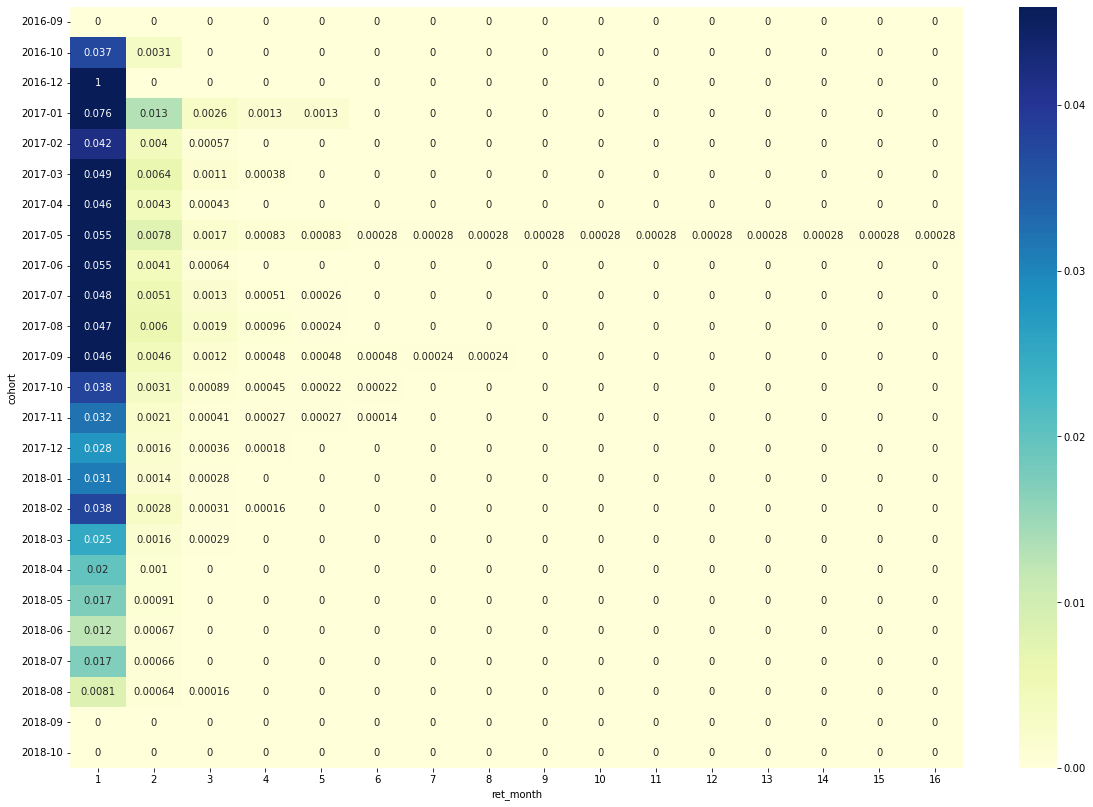

In [18]:
plt.figure(figsize=(20, 14))
sns.heatmap(task5, robust=True, annot=True, cmap="YlGnBu")

### Задача 6:
Построй RFM-кластеры для пользователей. Выведи для каждого кластера средние значения метрик R, F, M. 
(подробно опиши, как были построены метрики R, F, M).

<img src='https://camo.githubusercontent.com/2d9a7903f6222390bc3ccccd0fc9e17a3bcb3547a2eff40f691fee6985e74068/68747470733a2f2f643335666f3832666a63773079382e636c6f756466726f6e742e6e65742f323031382f30332f30313031333530382f496e636f6e74656e745f696d6167652e706e67'>

In [21]:
"""
1. Выбрать методику расчёта RFM-кластеров
2. Я выбрал простейшую для e-comm: 
    R - время в днях с последнего заказа 
    F - количество заказов за всё время
    M - общая сумма покупок за всё время
3. Кластеризация тоже простейшая: разбиение по квартилям этих метрик
4. Рассчитал время от каждого заказа до максимально возможного времени внутри датасета
5. Рассчитал стоимость заказа для каждого заказа в данных
6. Приджойнил стоимости и уникальные id пользователей к данным
7. Для каждого пользователя вычислил:
    срок в днях от его последнего заказа
    суммарное количество заказов
    общую сумму заказов
8. С помощью np.digitize присвоил каждому пользователю квартиль внутри метрики

"""

max_date = parser.parse(orders.order_purchase_timestamp.max())

orders['days_to_max'] = list(map(lambda x: x.days, (max_date - orders.order_purchase_timestamp.apply(parser.parse))))
task6 = (
    orders[~orders.order_status.isin(['created'])]
        .merge(
            users[['customer_id', 'customer_unique_id']], 
            on='customer_id', 
            how='left'
        )
        .merge(
            items
                .groupby('order_id', as_index=False)
                .price.sum()
        )
        .groupby('customer_unique_id', as_index=False)
        .agg({'order_id': 'size', 'days_to_max': 'min', 'price': 'sum'})
)

intervals_r = list(task6.days_to_max.describe())[3:]
intervals_f = [1, 2, 3, 16]
intervals_m = list(task6.price.describe())[3:]

task6['recency'] = task6.days_to_max.apply(lambda x: np.digitize(x, intervals_r))
task6['frequency'] = task6.order_id.apply(lambda x: np.digitize(x, intervals_f))
task6['monetary'] = task6.price.apply(lambda x: np.digitize(x, intervals_m))
task6['merged_cluster'] = task6.recency.astype('str') + task6.frequency.astype('str') + task6.monetary.astype('str')

In [22]:
task6.head(3)

,customer_unique_id,order_id,days_to_max,price,recency,frequency,monetary,merged_cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,1,160,129.9,1,1,3,113
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,163,18.9,2,1,1,211
2,0000f46a3911fa3c0805444483337064,1,585,69.0,4,1,2,412


In [23]:
task6.groupby('merged_cluster', as_index=False)['order_id', 'days_to_max', 'price'].mean()

/var/folders/1d/ns2_mhcx2599g7zqsmbp6x0m0000gn/T/ipykernel_68919/3948845413.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  task6.groupby('merged_cluster', as_index=False)['order_id', 'days_to_max', 'price'].mean()


,merged_cluster,order_id,days_to_max,price
0,111,1.000000,104.699932,29.157138
1,112,1.000000,103.916477,65.748422
2,113,1.000000,106.716981,118.320479
3,114,1.000000,106.624241,365.723449
4,121,2.000000,102.142857,36.253571
5,122,2.000000,110.510417,70.345417
6,123,2.000000,104.745455,121.330424
7,124,2.000000,106.899083,350.391904
8,132,3.000000,85.000000,72.107500
9,133,3.000000,94.285714,113.071429
